In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

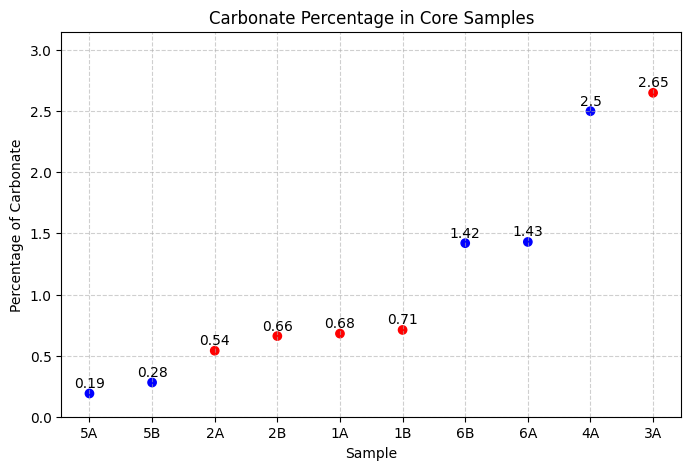

In [3]:
#Samples with carbonate percentages
# Sample names and carbonate percentages
samples = ['5A', '5B', '2A', '2B', '1A', '1B', '6B', '6A', '4A', '3A']
percentages = [0.19, 0.28, 0.54, 0.66, 0.68, 0.71, 1.42, 1.43, 2.5, 2.65]

# Define samples to be colored blue
blue_samples = {'5A', '5B', '6B', '6A', '4A'}
colors = ['b' if sample in blue_samples else 'r' for sample in samples]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(samples, percentages, color=colors, label='Carbonate %')

# Annotate each point
for i, txt in enumerate(percentages):
    plt.text(samples[i], percentages[i] + 0.05, str(txt), ha='center', fontsize=10)

# Labels
plt.xlabel('Sample')
plt.ylabel('Percentage of Carbonate')
plt.title('Carbonate Percentage in Core Samples')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, max(percentages) + 0.5)
#plt.legend()


#plt.savefig('perper.png')
plt.show()

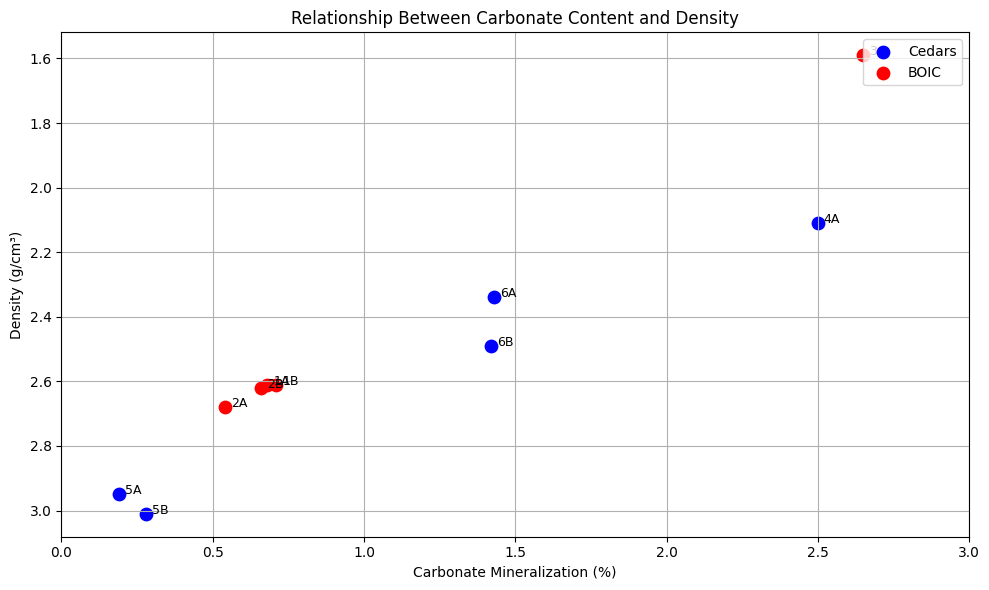

In [5]:
#Carbon content and denisty


samples = ['5A', '5B', '2A', '2B', '1A', '1B', '6B', '6A', '4A', '3A']
percentages = [0.19, 0.28, 0.54, 0.66, 0.68, 0.71, 1.42, 1.43, 2.5, 2.65]
densities = [2.95, 3.01, 2.68, 2.62, 2.61, 2.61, 2.49, 2.34, 2.11, 1.59]


boic_samples = {'1A', '1B', '2A', '2B', '3A'}

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each sample with corresponding color and label
for i, sample in enumerate(samples):
    if sample in boic_samples:
        plt.scatter(percentages[i], densities[i], color='red', s=80, label='BOIC' if 'BOIC' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(percentages[i], densities[i], color='blue', s=80, label='Cedars' if 'Cedars' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(percentages[i] + 0.02, densities[i], sample, fontsize=9)

# Labels 
plt.xlabel('Carbonate Mineralization (%)')
plt.ylabel('Density (g/cm³)')
plt.title('Relationship Between Carbonate Content and Density')

# Adjust the x-axis range and ticks
plt.xlim(0, 3)
plt.xticks(np.arange(0, 3.1, 0.5))

# Invert y-axis
plt.gca().invert_yaxis()

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

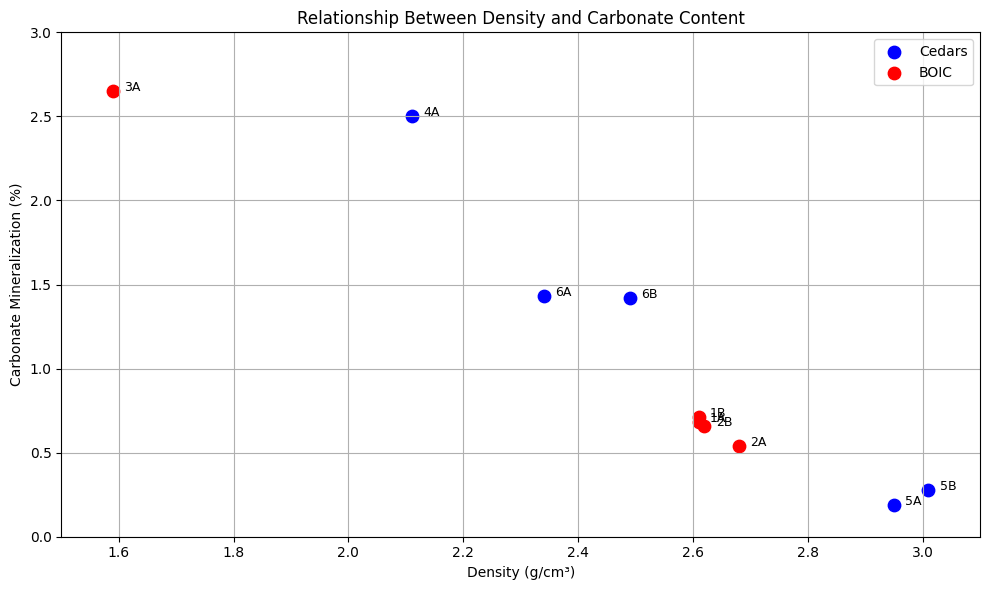

In [6]:
#Flip axis


samples = ['5A', '5B', '2A', '2B', '1A', '1B', '6B', '6A', '4A', '3A']
percentages = [0.19, 0.28, 0.54, 0.66, 0.68, 0.71, 1.42, 1.43, 2.5, 2.65]
densities = [2.95, 3.01, 2.68, 2.62, 2.61, 2.61, 2.49, 2.34, 2.11, 1.59]

# Define BOIC and Cedars sample groups
boic_samples = {'1A', '1B', '2A', '2B', '3A'}


plt.figure(figsize=(10, 6))

# Plot each sample with corresponding color and label
for i, sample in enumerate(samples):
    if sample in boic_samples:
        plt.scatter(densities[i], percentages[i], color='red', s=80,
                    label='BOIC' if 'BOIC' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(densities[i], percentages[i], color='blue', s=80,
                    label='Cedars' if 'Cedars' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(densities[i] + 0.02, percentages[i], sample, fontsize=9)

# Labels 
plt.xlabel('Density (g/cm³)')
plt.ylabel('Carbonate Mineralization (%)')
plt.title('Relationship Between Density and Carbonate Content')

# Adjust x and y axis ranges
plt.xlim(1.5, 3.1)
plt.ylim(0, 3)
plt.yticks(np.arange(0, 3.1, 0.5))


plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

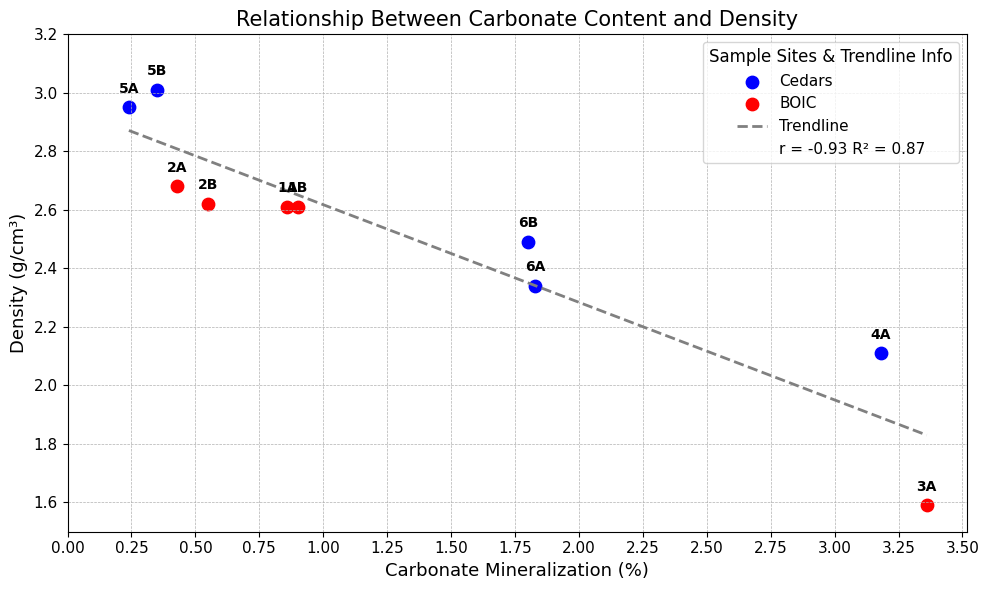

In [8]:
#add trendlines and r values

samples = ['5A', '5B', '2A', '2B', '1A', '1B', '6B', '6A', '4A', '3A']
percentages = [0.24, 0.35, 0.43, 0.55, 0.86, 0.90, 1.80, 1.83, 3.18, 3.36]
densities = [2.95, 3.01, 2.68, 2.62, 2.61, 2.61, 2.49, 2.34, 2.11, 1.59]

# Define BOIC and Cedars sample groups
boic_samples = {'1A', '1B', '2A', '2B', '3A'}

plt.figure(figsize=(10, 6))
added_labels = set()

# Plot each sample
for i, sample in enumerate(samples):
    if sample in boic_samples:
        label = 'BOIC' if 'BOIC' not in added_labels else None
        color = 'red'
    else:
        label = 'Cedars' if 'Cedars' not in added_labels else None
        color = 'blue'

    plt.scatter(percentages[i], densities[i], color=color, s=80, label=label)
    if label:
        added_labels.add(label)


    plt.text(percentages[i], densities[i] + 0.05, sample, fontsize=10, weight='bold', ha='center')

# Fit linear trendline
coeffs = np.polyfit(percentages, densities, deg=1)
trendline = np.poly1d(coeffs)
x_vals = np.linspace(min(percentages), max(percentages), 100)
plt.plot(x_vals, trendline(x_vals), color='gray', linestyle='--', linewidth=2, label='Trendline')

# Calculate r values
r_matrix = np.corrcoef(percentages, densities)
r = r_matrix[0, 1]
R_squared = r**2

trendline_label = (f"r = {r:.2f}"
                   f" R² = {R_squared:.2f}")
plt.plot([], [], ' ', label=trendline_label)  # Empty handle for custom text

# Labels 
plt.xlabel('Carbonate Mineralization (%)', fontsize=13)
plt.ylabel('Density (g/cm³)', fontsize=13)
plt.title('Relationship Between Carbonate Content and Density', fontsize=15)

# Set y-axis from 0 to 3 instead of inverting it
plt.ylim(1.5, 3.2)


plt.xticks(np.arange(0, 3.6, 0.25), fontsize=11)
plt.yticks(fontsize=11)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.legend(title='Sample Sites & Trendline Info', title_fontsize=12, fontsize=11, loc='upper right')
plt.tight_layout()
#plt.savefig('densitiesvspercent1.png')
plt.show()

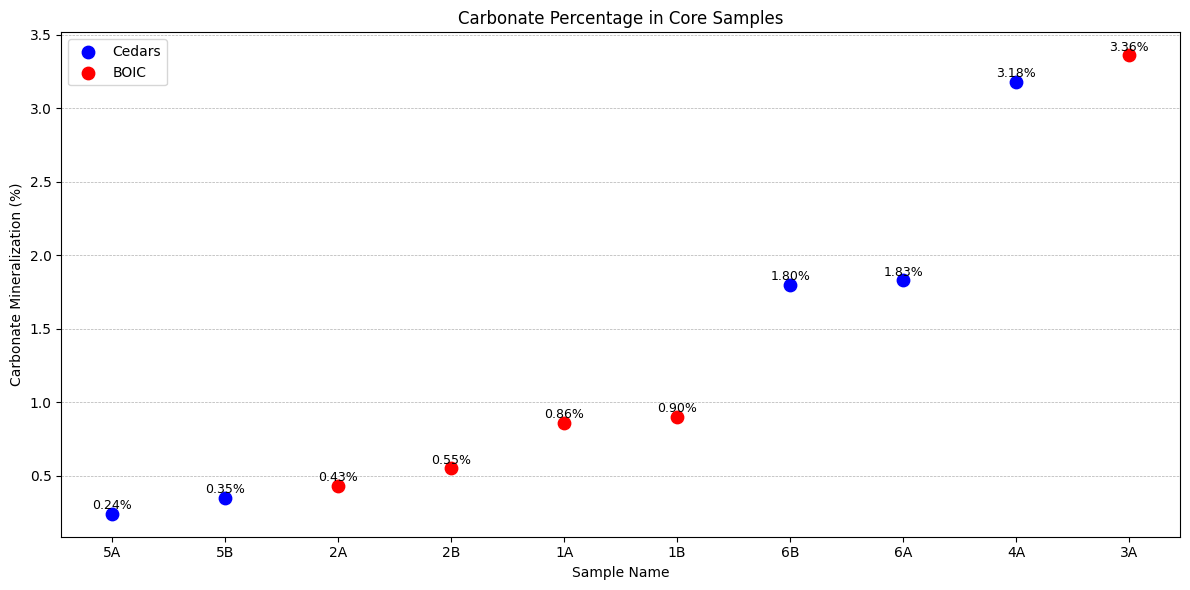

In [9]:
#Just plot carbonate data

samples = ['5A', '5B', '2A', '2B', '1A', '1B', '6B', '6A', '4A', '3A']
percentages = [0.24, 0.35, 0.43, 0.55, 0.86, 0.90, 1.80, 1.83, 3.18, 3.36]
boic_samples = {'1A', '1B', '2A', '2B', '3A'}


plt.figure(figsize=(12, 6))

# Plot each sample with corresponding color and label
for i, sample in enumerate(samples):
    if sample in boic_samples:
        plt.scatter(sample, percentages[i], color='red', s=80,
                    label='BOIC' if 'BOIC' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(sample, percentages[i], color='blue', s=80,
                    label='Cedars' if 'Cedars' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    # Add the percentage value next to each point
    plt.text(sample, percentages[i] + 0.03, f'{percentages[i]:.2f}%', fontsize=9, ha='center')

# Labels 
plt.xlabel('Sample Name')
plt.ylabel('Carbonate Mineralization (%)')
plt.title('Carbonate Percentage in Core Samples')


plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.legend()
plt.tight_layout()
plt.show()